In [31]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
pwd = os.getcwd()

In [4]:
calories = pd.read_csv(pwd + '//calories.csv')
calories

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [5]:
exercise = pd.read_csv(pwd + '//exercise.csv')
exercise

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [6]:
df = pd.merge(exercise,calories, on='User_ID')

In [19]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [22]:
df.duplicated().any()

False

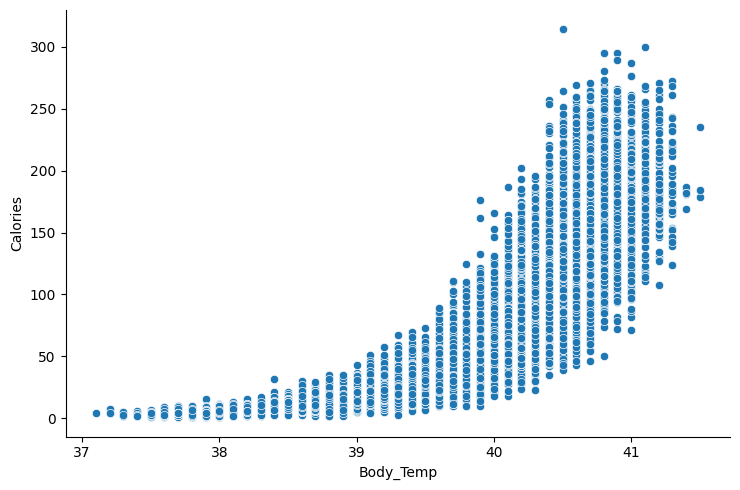

In [18]:
sns.relplot(x = 'Body_Temp', y='Calories', data = df, aspect=1.5)

In [50]:
def plot_graph(data):
    num_columns = data.select_dtypes(include = np.number).columns
    for col in num_columns:
        plt.figure(figsize = (5,3))
        sns.displot(data[col], kde = True)
        plt.title(f'Histogram for {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
        
    cat_columns = data.select_dtypes(include = 'object').columns
    for col in cat_columns:
        plt.figure(figsize = (5,3))
        sns.countplot(data[col], color = 'green')
        plt.title(f'Histogram for {col}')
        plt.xlabel(col)
        plt.ylabel('Amount')
        plt.show()

<Figure size 500x300 with 0 Axes>

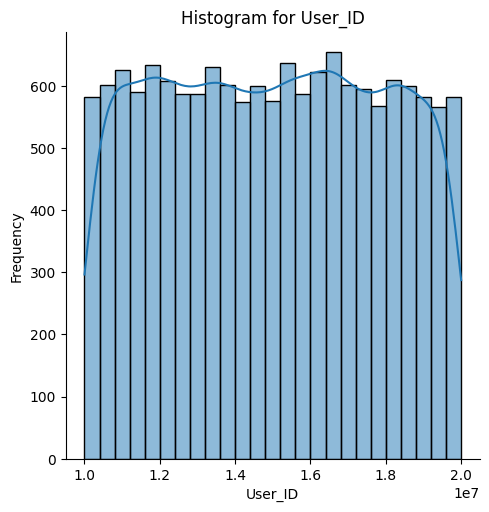

<Figure size 500x300 with 0 Axes>

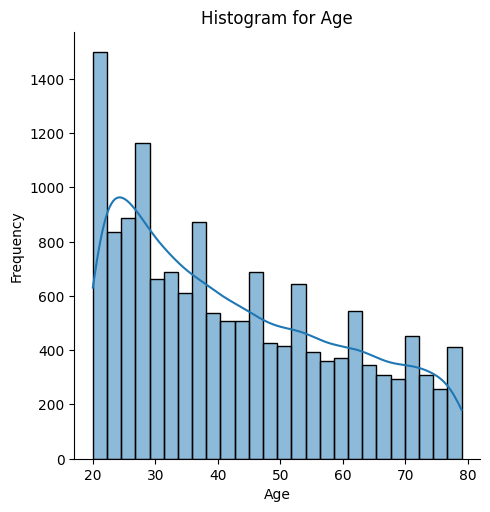

<Figure size 500x300 with 0 Axes>

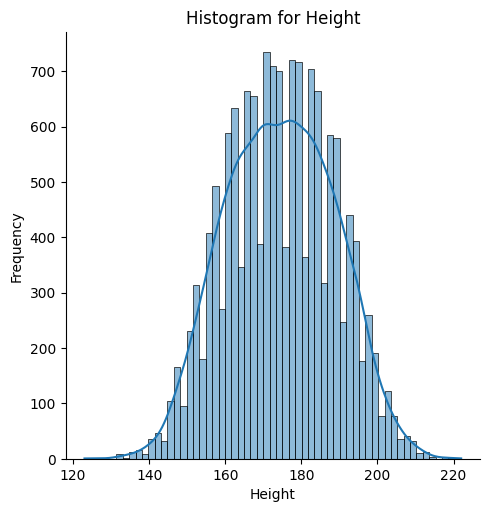

<Figure size 500x300 with 0 Axes>

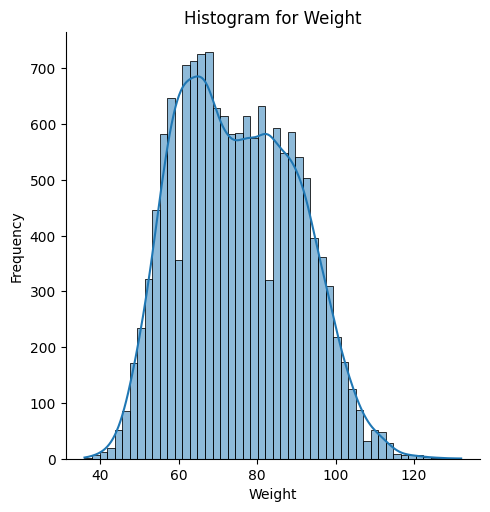

<Figure size 500x300 with 0 Axes>

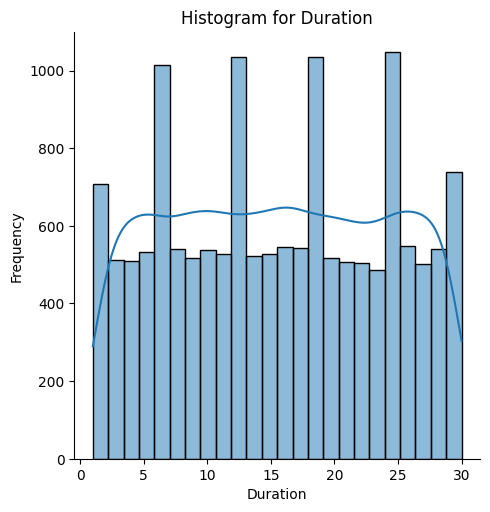

<Figure size 500x300 with 0 Axes>

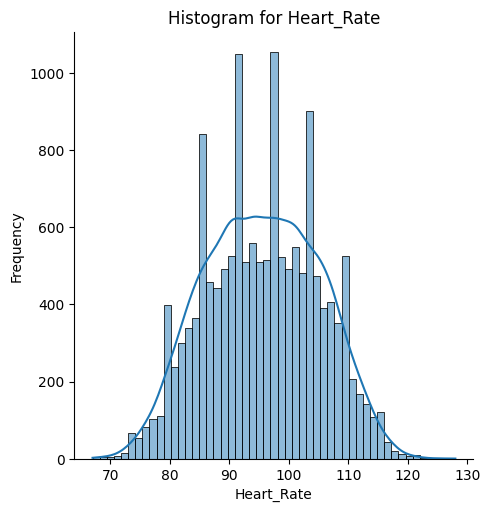

<Figure size 500x300 with 0 Axes>

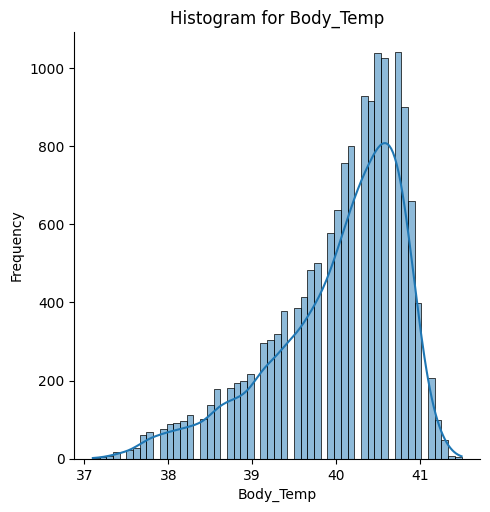

<Figure size 500x300 with 0 Axes>

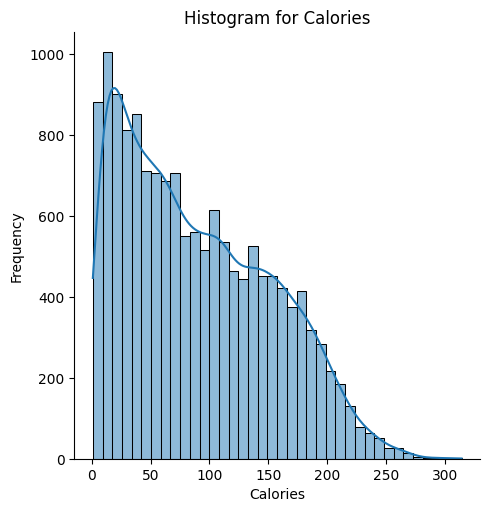

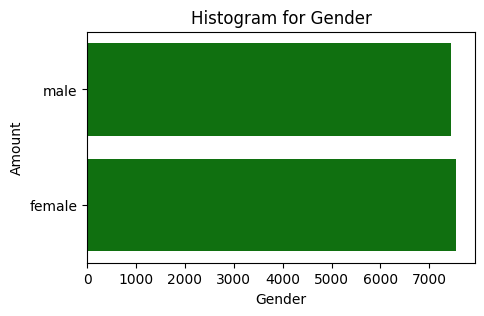

In [51]:
plot_graph(df)

In [52]:
df.drop('User_ID', axis =1, inplace = True)
df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [55]:
X = df.drop('Calories', axis =1)
y = df['Calories']

In [53]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

### Column transformer and Pipeline

In [63]:
from sklearn.pipeline import make_pipeline, Pipeline

In [58]:
from sklearn.compose import ColumnTransformer

In [59]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

In [60]:
X.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp'],
      dtype='object')

In [66]:
preprocessor = ColumnTransformer(transformers=[
    ('Cat', OrdinalEncoder(),['Gender']),
    ('num', StandardScaler(), ['Age', 'Height','Weight','Duration','Heart_Rate','Body_Temp'])],
                 remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('Cat', OrdinalEncoder(), ['Gender']),
                                ('num', StandardScaler(),
                                 ['Age', 'Height', 'Weight', 'Duration',
                                  'Heart_Rate', 'Body_Temp'])])

In [67]:
from sklearn.linear_model import LinearRegression

In [70]:
pipeline = Pipeline([('preprocessor', preprocessor),
          ('model', LinearRegression())])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Cat', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model', LinearRegression())])

In [73]:
from sklearn import set_config

In [74]:
set_config(display= 'diagram')

In [75]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Cat', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model', LinearRegression())])

In [76]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Cat', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model', LinearRegression())])

In [77]:
y_pred = pipeline.predict(X_test)

In [80]:
from sklearn.metrics import r2_score, mean_absolute_error

In [81]:
mean_absolute_error(y_test, y_pred)

8.441513553849706

In [79]:
r2_score(y_test, y_pred)

0.9672937151257295

In [84]:
from sklearn.model_selection import KFold, cross_val_score

In [83]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [85]:
cv_scores = cross_val_score(pipeline, X, y, cv=kfold)
cv_scores

array([0.96729372, 0.96543156, 0.9674671 , 0.96819535, 0.96731342])

In [86]:
cv_scores.mean()

0.9671402283675841

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBRegressor

In [103]:
model_dict = {
    'lr': LinearRegression(),
    'rf': RandomForestRegressor(),
    'XGBR': XGBRegressor()
}

def best_model(model_name, model):
    output = []
    output.append(model_name)
    
    pipeline = Pipeline([('preprocessor', preprocessor),
          ('model', model)])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    output.append(r2_score(y_test, y_pred))
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(pipeline, X, y, cv=kfold)
    output.append(cv_scores.mean())
    
    output.append(mean_absolute_error(y_test, y_pred))
    
    return output

In [109]:
model_output = []

for model_name, model in model_dict.items():
    model_output.append({
        'model':best_model(model_name, model)[0],
        'r2_score':best_model(model_name, model)[1],
        'mean_cv_score':best_model(model_name, model)[2],
        'mean_abs_error':best_model(model_name, model)[3]})
    

In [110]:
model_output

[{'model': 'lr',
  'r2_score': 0.9672937151257295,
  'mean_cv_score': 0.9671402283675841,
  'mean_abs_error': 8.441513553849706},
 {'model': 'rf',
  'r2_score': 0.9982753636457454,
  'mean_cv_score': 0.9979290927029034,
  'mean_abs_error': 1.7086999999999999},
 {'model': 'XGBR',
  'r2_score': 0.9988678909361673,
  'mean_cv_score': 0.9988510864545181,
  'mean_abs_error': 1.4981198125282924}]

In [112]:
result = pd.DataFrame(model_output, columns=['model','r2_score','mean_cv_score','mean_abs_error'])
result

,model,r2_score,mean_cv_score,mean_abs_error
0,lr,0.967294,0.967140,8.441514
1,rf,0.998275,0.997929,1.708700
2,XGBR,0.998868,0.998851,1.498120


In [118]:
pipeline = Pipeline([('preprocessor',preprocessor),('model', XGBRegressor())])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Cat', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, dev...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [121]:
pipeline.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Cat', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, dev...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [122]:
sample = pd.DataFrame({
   'Gender':'male',
    'Age':68,
    'Height':190.0,
    'Weight':94.0,
    'Duration':29.0,
    'Heart_Rate':105.0,
    'Body_Temp':40.8,
},index=[0])
sample

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,male,68,190.0,94.0,29.0,105.0,40.8


In [125]:
pipeline.predict(sample)

array([231.0721], dtype=float32)

In [126]:
import pickle

In [131]:
with open('pipeline.pickle', 'wb') as f:
    pickle.dump(pipeline,f)

In [132]:
with open('pipeline.pickle','rb') as f:
    pipeline_saved = pickle.load(f)

In [134]:
result = pipeline_saved.predict(sample)
result

array([231.0721], dtype=float32)

### GUI

In [ ]:
import pickle
import pandas as pd
from tkinter import *

def show_entry():
    
    with open('pipeline.pkl','rb') as f:
        pipeline = pickle.load(f)

    p1 = str(clicked.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())

    sample = pd.DataFrame({
    'Gender':[p1],
    'Age':[p2],
    'Height':[p3],
    'Weight':[p4],
    'Duration':[p5],
    'Heart_Rate':[p6],
    'Body_Temp':[p7],
},index=[0])

    result = pipeline.predict(sample)
    print(result)
    Label(master, text="Amount of Calories Burnt").grid(row=13)
    Label(master, text=result[0]).grid(row=14)
        
    
master =Tk()
master.title("Calories Burnt Prediction using Machine Learning")
label = Label(master,text = "Calories Burnt Prediction",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Select Gender").grid(row=1)
Label(master,text = "Enter Your Age").grid(row=2)
Label(master,text = "Enter Your Height").grid(row=3)
Label(master,text = "Enter Your Weight").grid(row=4)
Label(master,text = "Duration").grid(row=5)
Label(master,text = "Heart Rate").grid(row=6)
Label(master,text = "Body Temp").grid(row=7)

clicked = StringVar()
options = ['male', 'female']

e1 = OptionMenu(master , clicked , *options )
e1.configure(width=15)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)



Button(master,text="Predict",command=show_entry).grid()

mainloop()